In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

nb_classes = 10

Using TensorFlow backend.


In [4]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), 
              metrics=['accuracy'])

In [5]:
from keras.datasets import mnist
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 49s 4us/step


In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Put everything on grayscale
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

#### Split Training and Validation Data

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

In [9]:
X_train[0].shape

(784,)

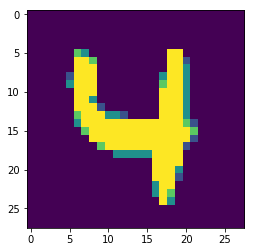

In [10]:
plt.imshow(X_train[0].reshape(28, 28))

In [11]:
print(np.asarray(range(10)))
print(Y_train[0].astype('int'))

[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 1 0 0 0 0 0]


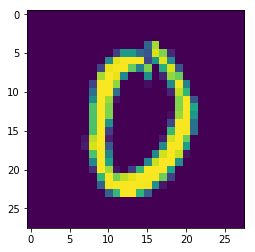

In [12]:
plt.imshow(X_val[0].reshape(28, 28))

In [13]:
print(np.asarray(range(10)))
print(Y_val[0].astype('int'))

[0 1 2 3 4 5 6 7 8 9]
[1 0 0 0 0 0 0 0 0 0]


In [14]:
network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=2, verbose=1, validation_data=(X_val, Y_val))

Train on 45000 samples, validate on 15000 samples
Epoch 1/2
45000/45000 [==============================] - 8s 182us/step - loss: 2.1830 - acc: 0.2860 - val_loss: 2.0655 - val_acc: 0.4613
Epoch 2/2
45000/45000 [==============================] - 7s 157us/step - loss: 1.9453 - acc: 0.5901 - val_loss: 1.8314 - val_acc: 0.6611


### Plotting Network Performance Trend


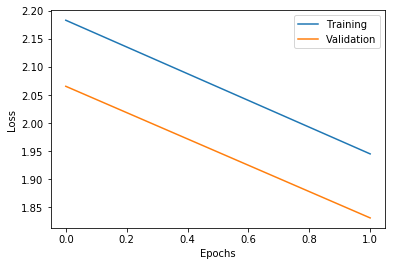

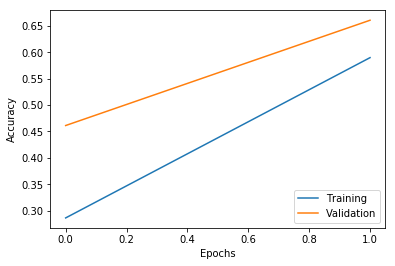

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

In [16]:
# Your code here
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), 
              metrics=['accuracy'])
network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=2, verbose=1, validation_data=(X_val, Y_val))

Train on 45000 samples, validate on 15000 samples
Epoch 1/2
45000/45000 [==============================] - 7s 161us/step - loss: 1.7064 - acc: 0.7078 - val_loss: 1.5912 - val_acc: 0.7277
Epoch 2/2
45000/45000 [==============================] - 7s 161us/step - loss: 1.4687 - acc: 0.7524 - val_loss: 1.3620 - val_acc: 0.7635


Train on 45000 samples, validate on 15000 samples
Epoch 1/4
45000/45000 [==============================] - 7s 154us/step - loss: 1.2534 - acc: 0.7810 - val_loss: 1.1658 - val_acc: 0.7833
Epoch 2/4
45000/45000 [==============================] - 8s 171us/step - loss: 1.0764 - acc: 0.8008 - val_loss: 1.0111 - val_acc: 0.8013
Epoch 3/4
45000/45000 [==============================] - 9s 209us/step - loss: 0.9394 - acc: 0.8173 - val_loss: 0.8934 - val_acc: 0.8161
Epoch 4/4
45000/45000 [==============================] - 9s 192us/step - loss: 0.8353 - acc: 0.8294 - val_loss: 0.8042 - val_acc: 0.8279


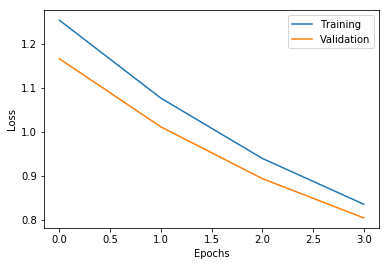

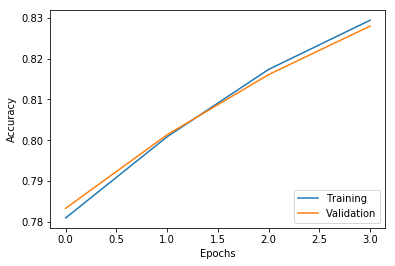

In [21]:
network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=4, verbose=1, validation_data=(X_val, Y_val))
plot_history(network_history)

In [23]:
# %load solutions/sol23.py
from keras.layers.core import Dropout
from keras import backend as K
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=1)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(), 
              metrics=['accuracy'])
    
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=20, 
          batch_size=128, verbose=True, callbacks=[early_stop]) 

Train on 45000 samples, validate on 10000 samples
Epoch 1/20
45000/45000 [==============================] - 10s 221us/step - loss: 1.3495 - acc: 0.6578 - val_loss: 0.6433 - val_acc: 0.8502
Epoch 2/20
45000/45000 [==============================] - 9s 207us/step - loss: 0.6049 - acc: 0.8359 - val_loss: 0.4264 - val_acc: 0.8880
Epoch 3/20
45000/45000 [==============================] - 10s 212us/step - loss: 0.4703 - acc: 0.8632 - val_loss: 0.3635 - val_acc: 0.8999
Epoch 4/20
45000/45000 [==============================] - 10s 220us/step - loss: 0.4126 - acc: 0.8819 - val_loss: 0.3272 - val_acc: 0.9089
Epoch 5/20
45000/45000 [==============================] - 9s 198us/step - loss: 0.3774 - acc: 0.8901 - val_loss: 0.3043 - val_acc: 0.9123
Epoch 6/20
45000/45000 [==============================] - 9s 200us/step - loss: 0.3521 - acc: 0.8984 - val_loss: 0.2850 - val_acc: 0.9200
Epoch 7/20
45000/45000 [==============================] - 9s 196us/step - loss: 0.3305 - acc: 0.9042 - val_loss: 0.2715

---

### `model.layers` is iterable

In [26]:
model_truncated = Sequential()
model_truncated.add(Dense(512, activation='relu', input_shape=(784,)))
model_truncated.add(Dropout(0.2))
model_truncated.add(Dense(512, activation='relu'))

for i, layer in enumerate(model_truncated.layers):
    layer.set_weights(model.layers[i].get_weights())

model_truncated.compile(loss='categorical_crossentropy', optimizer=SGD(), 
              metrics=['accuracy'])

In [27]:
# Check
np.all(model_truncated.layers[0].get_weights()[0] == model.layers[0].get_weights()[0])

True

In [28]:
hidden_features = model_truncated.predict(X_train)

In [29]:
hidden_features.shape

(45000, 512)

In [30]:
X_train.shape

(45000, 784)

---

### Generate the Embedding of Hidden Features

In [31]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(hidden_features[:1000]) ## Reduced for computational issues

In [32]:
colors_map = np.argmax(Y_train, axis=1)

In [33]:
X_tsne.shape

(1000, 2)

In [34]:
nb_classes

10

In [35]:
np.where(colors_map==6)

(array([    6,    11,    16, ..., 44951, 44956, 44970]),)

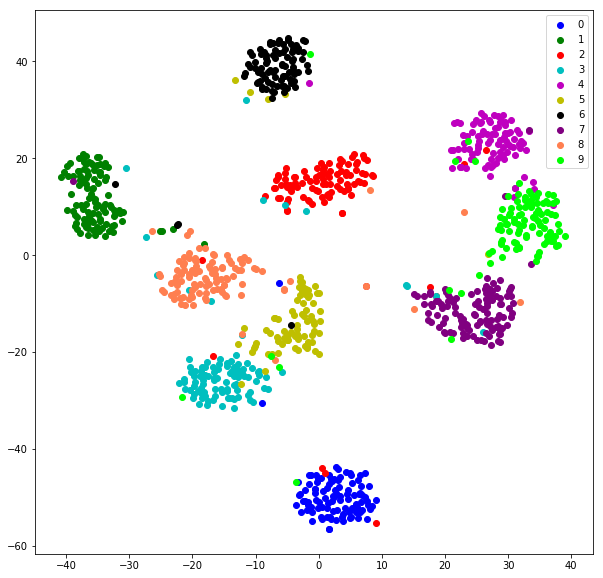

In [36]:
colors = np.array([x for x in 'b-g-r-c-m-y-k-purple-coral-lime'.split('-')])
colors_map = colors_map[:1000]
plt.figure(figsize=(10,10))
for cl in range(nb_classes):
    indices = np.where(colors_map==cl)
    plt.scatter(X_tsne[indices,0], X_tsne[indices, 1], c=colors[cl], label=cl)
plt.legend()
plt.show()

## Using Bokeh (Interactive Chart)

In [40]:
from bokeh.plotting import figure, output_notebook, show

output_notebook()

Loading BokehJS ...

In [41]:
p = figure(plot_width=600, plot_height=600)

colors = [x for x in 'blue-green-red-cyan-magenta-yellow-black-purple-coral-lime'.split('-')]
colors_map = colors_map[:1000]
for cl in range(nb_classes):
    indices = np.where(colors_map==cl)
    p.circle(X_tsne[indices, 0].ravel(), X_tsne[indices, 1].ravel(), size=7, 
             color=colors[cl], alpha=0.4, legend=str(cl))

# show the results
p.legend.location = 'bottom_right'
show(p)